# Notebook

Der Python-Code umfasst eine Vielzahl an Bibliotheken, wie NumPy, Pandas, Matplotlib, Seaborn, SciPy, Scikit-learn, PyTorch, Pygame, Requests und SQLAlchemy. Der Fokus liegt auf Datenanalyse, maschinellem Lernen, Grafikdarstellung und Datenbankoperationen. 

Die Verbesserungen betreffen mehrere Aspekte. Zunächst wurde eine umfassende **Dokumentation** durch Docstrings und Kommentare hinzugefügt, um die Verständlichkeit des Codes zu erhöhen. Zudem wurde eine **Fehlerbehandlung** implementiert, um potenzielle Fehler in den verschiedenen Funktionen abzufangen und zu protokollieren, insbesondere bei HTTP-Anfragen und Datenbankoperationen. 

Zur **Modularisierung** wurden SQLAlchemy-Modelle definiert und die Funktionen logisch getrennt, um die Wiederverwendbarkeit zu fördern. Außerdem wurden **Performance-Optimierungen** bei der Visualisierung großer Datenmengen in der `pandas_seaborn_example`-Funktion vorgenommen, um die Effizienz zu verbessern.

Die **Benutzerinteraktion** in Pygame wurde erweitert, sodass das Programm nun auf Benutzeraktionen wie das Schließen des Fensters reagiert. Schließlich wurde ein **Logging-System** eingerichtet, das wichtige Informationen, Warnungen und Fehler protokolliert, um die Debugging-Fähigkeiten zu verbessern.

Diese Änderungen verbessern die Struktur, Benutzerfreundlichkeit und Wartbarkeit des Codes erheblich und gewährleisten eine robuste und effiziente Ausführung der verschiedenen Demonstrationen.

pygame 2.6.0 (SDL 2.30.7, Python 3.12.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


interactive(children=(IntSlider(value=5, description='size', max=10, min=1), Output()), _dom_classes=('widget-…

interactive(children=(IntSlider(value=50, description='rows', max=200, min=10, step=10), Output()), _dom_class…

interactive(children=(Dropdown(description='Funktionstyp:', options=('linear', 'quadratic', 'cubic'), value='l…

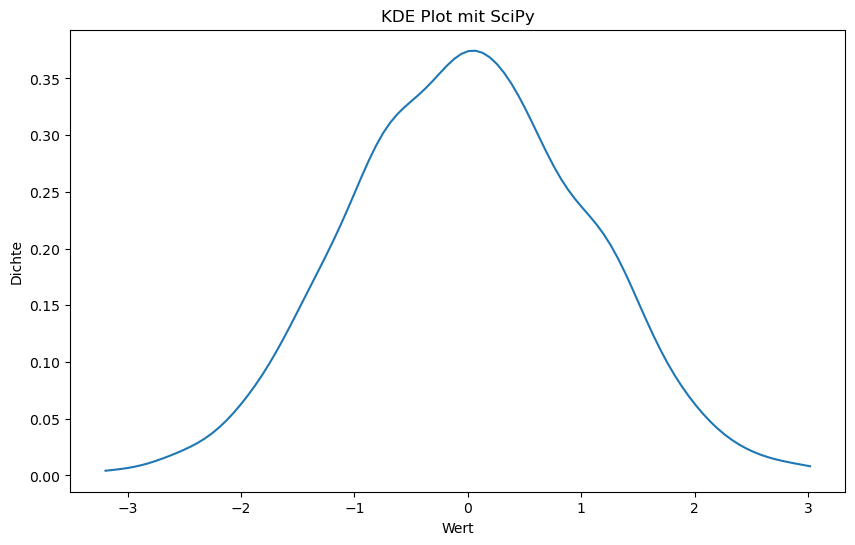

Genauigkeit des Modells: 1.00
PyTorch Tensor:
tensor([[ 0.8768,  1.6091, -1.2619],
        [-1.2175,  0.4161, -0.0572],
        [-1.2709, -0.6149,  1.0070],
        [ 1.6220,  0.2057,  0.1930],
        [-0.1122, -0.9012,  0.6234]])
Summe: tensor(1.1173)
Mittelwert: tensor(0.0745)


INFO: Neuer Benutzer hinzugefügt.


Pygame: Das Fenster wurde geschlossen.
GitHub API Status: 200
Headers:
Date: Sat, 28 Sep 2024 21:15:02 GMT
Content-Type: application/json; charset=utf-8
Cache-Control: public, max-age=60, s-maxage=60
Vary: Accept,Accept-Encoding, Accept, X-Requested-With
ETag: W/"4f825cc84e1c733059d46e76e6df9db557ae5254f9625dfe8e1b09499c449438"
X-GitHub-Media-Type: github.v3; format=json
x-github-api-version-selected: 2022-11-28
Access-Control-Expose-Headers: ETag, Link, Location, Retry-After, X-GitHub-OTP, X-RateLimit-Limit, X-RateLimit-Remaining, X-RateLimit-Used, X-RateLimit-Resource, X-RateLimit-Reset, X-OAuth-Scopes, X-Accepted-OAuth-Scopes, X-Poll-Interval, X-GitHub-Media-Type, X-GitHub-SSO, X-GitHub-Request-Id, Deprecation, Sunset
Access-Control-Allow-Origin: *
Strict-Transport-Security: max-age=31536000; includeSubdomains; preload
X-Frame-Options: deny
X-Content-Type-Options: nosniff
X-XSS-Protection: 0
Referrer-Policy: origin-when-cross-origin, strict-origin-when-cross-origin
Content-Security-

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, widgets
from scipy import stats
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import torch
import pygame
import requests
from sqlalchemy import create_engine, Column, Integer, String
from sqlalchemy.orm import declarative_base, sessionmaker
import logging

# Einrichtung des Loggings
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')

# SQLAlchemy-Basis-Klasse
Base = declarative_base()

class User(Base):
    """
    Modellklasse für Benutzer in der Datenbank.
    """
    __tablename__ = 'users'
    id = Column(Integer, primary_key=True)
    name = Column(String)

def numpy_example(size=5):
    """
    Generiert ein zufälliges NumPy-Array und berechnet Mittelwert sowie Standardabweichung.
    
    Parameters:
    size (int): Größe des Arrays.
    """
    try:
        array = np.random.rand(size)
        print('NumPy Array:', array)
        print('Mittelwert:', np.mean(array))
        print('Standardabweichung:', np.std(array))
    except Exception as e:
        logging.error(f"Fehler in numpy_example: {e}")

interact(numpy_example, size=widgets.IntSlider(min=1, max=10, step=1, value=5))

def pandas_seaborn_example(rows=50):
    """
    Erstellt einen Pandas DataFrame und visualisiert ihn mit Seaborn.
    
    Parameters:
    rows (int): Anzahl der Zeilen im DataFrame.
    """
    try:
        # Performance-Optimierung: Begrenzung der maximalen Zeilen
        max_rows = 200
        if rows > max_rows:
            logging.warning(f"Angeforderte Zeilenanzahl überschreitet das Maximum von {max_rows}. Begrenze auf {max_rows}.")
            rows = max_rows
        
        df = pd.DataFrame({
            'A': np.random.randn(rows),
            'B': np.random.randn(rows),
            'C': np.random.choice(['Gruppe1', 'Gruppe2', 'Gruppe3'], rows)
        })
        print('Pandas DataFrame (erste 5 Zeilen):')
        print(df.head())
        
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df, x='A', y='B', hue='C')
        plt.title('Seaborn Scatterplot')
        plt.show()
    except Exception as e:
        logging.error(f"Fehler in pandas_seaborn_example: {e}")

interact(pandas_seaborn_example, rows=widgets.IntSlider(min=10, max=200, step=10, value=50))

def plot_example(func_type='linear'):
    """
    Plottet eine mathematische Funktion basierend auf dem ausgewählten Typ.
    
    Parameters:
    func_type (str): Typ der Funktion ('linear', 'quadratic', 'cubic').
    """
    try:
        x = np.linspace(0, 10, 100)
        
        if func_type == 'linear':
            y = x
            title = 'Lineare Funktion'
        elif func_type == 'quadratic':
            y = x**2
            title = 'Quadratische Funktion'
        elif func_type == 'cubic':
            y = x**3
            title = 'Kubische Funktion'
        else:
            raise ValueError("Ungültiger Funktionstyp")
        
        plt.figure(figsize=(10, 6))
        plt.plot(x, y)
        plt.title(title)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.grid(True)
        plt.show()
        print(f"Plot für {title} wurde erstellt.")
    except Exception as e:
        logging.error(f"Fehler in plot_example: {e}")

interact(plot_example, func_type=widgets.Dropdown(
    options=['linear', 'quadratic', 'cubic'],
    value='linear',
    description='Funktionstyp:'
))

def scipy_example():
    """
    Erzeugt einen Kernel-Dichte-Schätzer (KDE) Plot mit SciPy.
    """
    try:
        x = np.random.normal(0, 1, 1000)
        kde = stats.gaussian_kde(x)
        x_range = np.linspace(min(x), max(x), 100)
        plt.figure(figsize=(10, 6))
        plt.plot(x_range, kde(x_range))
        plt.title('KDE Plot mit SciPy')
        plt.xlabel('Wert')
        plt.ylabel('Dichte')
        plt.show()
    except Exception as e:
        logging.error(f"Fehler in scipy_example: {e}")

scipy_example()

def sklearn_example():
    """
    Führt eine logistische Regression auf dem Iris-Datensatz durch und bewertet die Genauigkeit.
    """
    try:
        iris = load_iris()
        X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)
        model = LogisticRegression(max_iter=200)
        model.fit(X_train, y_train)
        accuracy = model.score(X_test, y_test)
        print(f"Genauigkeit des Modells: {accuracy:.2f}")
    except Exception as e:
        logging.error(f"Fehler in sklearn_example: {e}")

sklearn_example()

def pytorch_example():
    """
    Demonstriert die Erstellung und Berechnung von PyTorch-Tensoren.
    """
    try:
        x = torch.randn(5, 3)
        print("PyTorch Tensor:")
        print(x)
        print("Summe:", x.sum())
        print("Mittelwert:", x.mean())
    except Exception as e:
        logging.error(f"Fehler in pytorch_example: {e}")

pytorch_example()

def pygame_example():
    """
    Erstellt ein Pygame-Fenster, in dem ein roter Kreis gezeichnet wird. Ermöglicht Benutzerinteraktionen zum Beenden des Fensters.
    """
    try:
        pygame.init()
        screen = pygame.display.set_mode((300, 200))
        pygame.display.set_caption('Pygame Beispiel')
        clock = pygame.time.Clock()
        running = True

        while running:
            for event in pygame.event.get():
                if event.type == pygame.QUIT:
                    running = False
                elif event.type == pygame.KEYDOWN:
                    if event.key == pygame.K_ESCAPE:
                        running = False

            screen.fill((255, 255, 255))
            pygame.draw.circle(screen, (255, 0, 0), (150, 100), 30)
            pygame.display.flip()
            clock.tick(60)  # Begrenzung auf 60 FPS

        pygame.quit()
        print("Pygame: Das Fenster wurde geschlossen.")
    except Exception as e:
        logging.error(f"Fehler in pygame_example: {e}")

pygame_example()

def requests_example():
    """
    Führt eine HTTP-Anfrage an die GitHub-API durch und gibt den Statuscode sowie die Header-Informationen aus.
    """
    try:
        response = requests.get('https://api.github.com', timeout=10)
        response.raise_for_status()  # Prüft auf HTTP-Fehler
        print(f"GitHub API Status: {response.status_code}")
        print("Headers:")
        for key, value in response.headers.items():
            print(f"{key}: {value}")
    except requests.exceptions.HTTPError as http_err:
        logging.error(f"HTTP-Fehler: {http_err}")
    except requests.exceptions.ConnectionError as conn_err:
        logging.error(f"Verbindungsfehler: {conn_err}")
    except requests.exceptions.Timeout as timeout_err:
        logging.error(f"Timeout-Fehler: {timeout_err}")
    except requests.exceptions.RequestException as req_err:
        logging.error(f"Allgemeiner Fehler bei der HTTP-Anfrage: {req_err}")

requests_example()

def sqlalchemy_example():
    """
    Demonstriert die Erstellung einer In-Memory-Datenbank mit SQLAlchemy, das Hinzufügen eines Benutzers und die Abfrage der Datensätze.
    """
    try:
        engine = create_engine('sqlite:///:memory:', echo=False)
        Base.metadata.create_all(engine)
        
        Session = sessionmaker(bind=engine)
        session = Session()
        
        # Hinzufügen eines neuen Benutzers
        new_user = User(name='John Doe')
        session.add(new_user)
        session.commit()
        logging.info("Neuer Benutzer hinzugefügt.")
        
        # Abfrage aller Benutzer
        users = session.query(User).all()
        for user in users:
            print(f"User ID: {user.id}, Name: {user.name}")
        
        session.close()
    except Exception as e:
        logging.error(f"Fehler in sqlalchemy_example: {e}")

sqlalchemy_example()
